# Temp/Flow Model Test

## Import dependencies and data

In [110]:
# import dependencies
import os
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
#import tensorflow as tf
#from tensorflow.keras import layers

In [111]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\'
plot_path = home_path + '\\plotting\\plots\\'

In [112]:
# get merged data
data = pd.read_csv(
    data_path + 'data_merged.csv',
    header=[0, 1],
    index_col=[0, 1, 2, 3]
)

# convert index.date col to datetime
data.index = data.index.set_levels(
    levels=pd.to_datetime(data.index.get_level_values(3).values),
    level=3
)

In [171]:
# Use temperature Diff. w.r.t. setpoint
data[('temperatures', 'TA01_GT10X_GM10X_diff')] = \
    data[('temperatures', 'TA01_GT10X_GM10X')] - data[('setpoints', 'TA01_GT10X_GM10X_default')]

In [181]:
# define X vars
x_vars = [
    ('state', 'DC_SP105_relative'),
    ('state', 'DC_SP107_relative'),
    ('state', 'DC_SP110_relative'),
    ('flow', 'TA01_SP102_relative'),
    ('flow', 'TA01_SP102_absolute'),
    ('flow', 'DC_SP105_relative'),
    ('flow', 'DC_SP105_absolute'),
    ('flow', 'DC_SP106_relative'),
    ('flow', 'DC_SP106_absolute'),
    ('flow', 'DC_SP107_relative'),
    ('flow', 'DC_SP107_absolute'),
    ('flow', 'DC_SP110_relative'),
    ('flow', 'DC_SP110_absolute'),
    ('flow', 'TA01_GP101_default'),
    ('pressure', 'TA01_GP101'),
    ('pressure', 'TA01_GP401'),
    ('pressure', 'DC_GP101'),
    ('temperatures', 'TA01_GT10X_GM10X'),
    ('temperatures', 'TA01_GT10X_GM10X_diff'),
    ('temperatures', 'DC_GT301_damped'),
    ('temperatures', 'DC_GT401_GM401')
]

mask = data.index.get_level_values(0) == 1
subset = data[mask][x_vars].copy()

## Describe Df

In [182]:
subset.describe().transpose()

count          mean           std   min  \
category     sensor_ID                                                          
state        DC_SP105_relative      86400.0     13.372939     25.714762   0.0   
             DC_SP107_relative      86400.0     50.893862     41.159384   0.0   
             DC_SP110_relative      86400.0     85.563016     22.752831   0.0   
flow         TA01_SP102_relative    86400.0     54.160030     58.820927   0.0   
             TA01_SP102_absolute    86400.0  16259.440613  21500.879207   0.0   
             DC_SP105_relative      86400.0     40.241690     49.260275   0.0   
             DC_SP105_absolute      86400.0  15266.111887  19769.134239   0.0   
             DC_SP106_relative      86400.0     69.214590     73.255371   0.0   
             DC_SP106_absolute      86400.0   4641.307477   9928.096763   0.0   
             DC_SP107_relative      86400.0      6.278558      7.049837   0.0   
             DC_SP107_absolute      86400.0   2983.873009   3349.019051   0.0   
             DC_SP110_relative      86400.0     12.884206      5.603772   0.0   
             DC_SP110_absolute      86400.0   6121.495961   2664.703296   0.0   
             TA01_GP101_default     86400.0   2316.332057    576.298878   0.0   
pressure     TA01_GP101             86400.0    381.425536    208.503177   0.0   
             TA01_GP401             86400.0    143.491713     39.113986   0.0   
             DC_GP101               86400.0      3.940398      0.527522   0.0   
temperatures TA01_GT10X_GM10X       86400.0     19.912385      0.813326   0.0   
             TA01_GT10X_GM10X_diff  86400.0     -0.087152      0.807663 -11.0   
             DC_GT301_damped        86400.0     -4.373360      5.989446 -19.3   
             DC_GT401_GM401         86400.0     49.563130      4.074420   0.0   

                                       25%     50%        75%      max  
category     sensor_ID                                                  
state        DC_SP105_relative         0.0     0.0     14.500    100.0  
             DC_SP107_relative         0.0    57.7     94.100     94.4  
             DC_SP110_relative        96.0    96.0     96.100     96.3  
flow         TA01_SP102_relative       0.0    32.5    110.100    150.0  
             TA01_SP102_absolute       0.0  3919.0  34670.000  65534.0  
             DC_SP105_relative         0.0     0.0     78.000    150.0  
             DC_SP105_absolute         0.0     0.0  30758.750  65534.0  
             DC_SP106_relative         0.0     0.0    150.000    150.0  
             DC_SP106_absolute         0.0     0.0   5744.000  65534.0  
             DC_SP107_relative         0.0     0.0     13.700     28.8  
             DC_SP107_absolute         0.0     0.0   6529.000  13747.0  
             DC_SP110_relative        13.0    14.9     16.200     32.4  
             DC_SP110_absolute      6158.0  7075.0   7702.000  14659.0  
             TA01_GP101_default     1862.4  2105.6   2582.600   4151.4  
pressure     TA01_GP101              232.2   296.7    446.525   1153.6  
             TA01_GP401              113.6   128.4    160.900    272.3  
             DC_GP101                  3.6     3.9      4.200     18.0  
temperatures TA01_GT10X_GM10X         19.8    20.0     20.100     29.2  
             TA01_GT10X_GM10X_diff    -0.2     0.0      0.100      9.2  
             DC_GT301_damped          -9.2    -2.9      0.500      7.4  
             DC_GT401_GM401           48.6    50.4     52.000     55.9

### Plot pairwise correlation matrix

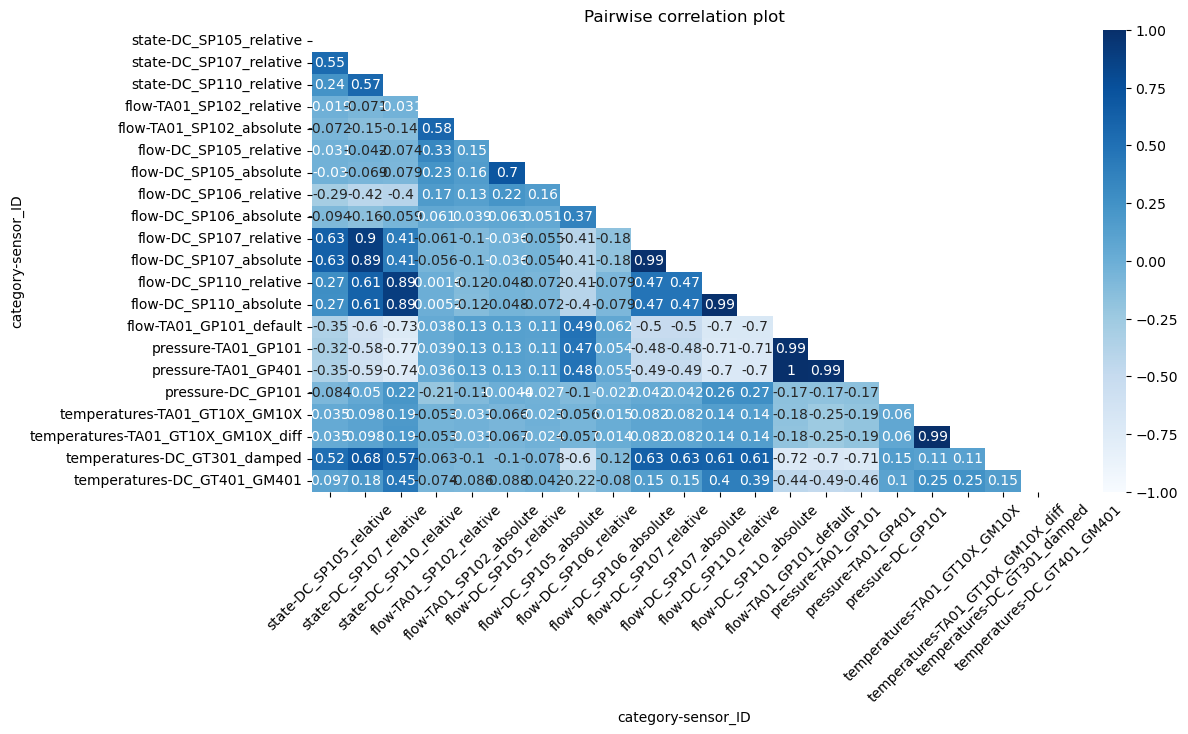

In [183]:
corr = subset.corr()

plt.figure(figsize=(12, 6))
#sns.heatmap(corr, vmin=-1.0, vmax=1.0, annot=True, cmap='Blues')

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmin=-1.0, vmax=1.0, annot=True, cmap='Blues')

plt.xticks(rotation=45)
plt.title('Pairwise correlation plot')
plt.show()

# delete correlation data
del corr